In [1]:
# Final Project
# Dataset choosen is Infectious Disease Cases by County, Year, and Sex
# You can find more information about the dataset here:
# https://data.chhs.ca.gov/dataset/infectious-disease-cases-by-county-year-and-sex

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import time
import csv
%matplotlib notebook

In [3]:
path = r'/home/infectious-disease-cases-by-county-year-and-sex-2-27-19.csv'

In [4]:
f = open(path, 'rt')

In [5]:
reader = csv.reader(f, delimiter = ',')

In [6]:
header = next(reader)

In [7]:
# Columns in the dataset
header

['Disease',
 'County',
 'Year',
 'Sex',
 'Count',
 'Population',
 'Rate',
 'CI. lower',
 'CI.upper',
 'Unstable']

In [8]:
# Data Filtering and Cleaning

In [9]:
# Frist create an empty dataset
# reassign fields to INT or Float

dataset = []

for x in reader:
    d = dict(zip(header, x))
    for field in ['Year', 'Count', 'Population']:
        d[field] = int(d[field])
    for field in ['Rate', 'CI. lower', 'CI.upper']:
        d[field] = float(d[field])
    dataset.append(d)

In [10]:
# Check the len of the new dataset
len(dataset)

132927

In [11]:
# View smaple of first entry in dataset
dataset[0]

{'Disease': 'Amebiasis',
 'County': 'Solano',
 'Year': 2005,
 'Sex': 'Total',
 'Count': 0,
 'Population': 410570,
 'Rate': 0.0,
 'CI. lower': 0.0,
 'CI.upper': 0.898,
 'Unstable': '-'}

In [12]:
# I only want to see the last 10 years of data collected
dataset = [d for d in dataset if d['Year'] >= 2006]

In [13]:
# Filter new dataset by small towns / under 10 thousand in population
smallTowns = [d for d in dataset if d['Population'] <= 10000]

In [14]:
# Check new dataset
smallTowns[0]

{'Disease': 'Amebiasis',
 'County': 'Mono',
 'Year': 2015,
 'Sex': 'Male',
 'Count': 0,
 'Population': 7253,
 'Rate': 0.0,
 'CI. lower': 0.0,
 'CI.upper': 50.847,
 'Unstable': '-'}

In [15]:
# Filter new dataset by large cities / over a millon in popualtion
largeCities = [d for d in dataset if d['Population'] >= 1000000]

In [16]:
# Check new dataset
largeCities[0]

{'Disease': 'Amebiasis',
 'County': 'Los Angeles',
 'Year': 2014,
 'Sex': 'Female',
 'Count': 17,
 'Population': 5127242,
 'Rate': 0.332,
 'CI. lower': 0.193,
 'CI.upper': 0.531,
 'Unstable': '*'}

In [17]:
# Separate male and female count totals to find total number of men infected 
# vs female. This could also be use to show totals on individual disease

male = [d for d in dataset if d['Sex'] == 'Male']
female = [d for d in dataset if d['Sex'] == 'Female']

maleCount = 0
femaleCount = 0
for x in male:
    maleCount += x['Count']

for x in female:
    femaleCount += x['Count']

In [18]:
# As you can see a large number of men infected
print(maleCount)
print(femaleCount)

782795
453444


<BarContainer object of 1 artists>

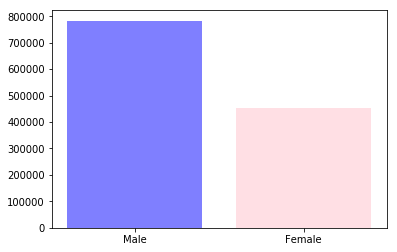

In [19]:
# Same number shown in a bar chart
alpha_color = 0.5
x = ['Male', 'Female']
plt.bar(x[0], maleCount, color='blue', alpha=alpha_color)
plt.bar(x[1], femaleCount, color='pink', alpha=alpha_color)

In [20]:
# Let try the same thing but fouce on one disease (HIV) and use another
# bar plot to show the difference between men and women count totals

In [21]:
male2 = [d for d in male if d['Disease'] == 'HIV']
female2 = [d for d in female if d['Disease'] == 'HIV']

In [22]:
male2Count = 0
female2Count = 0
for x in male2:
    male2Count += x['Count']

for x in female2:
    female2Count += x['Count']

In [23]:
# The number of men affected is much higher than women
print(male2Count)
print(female2Count)

94875
13098


<BarContainer object of 1 artists>

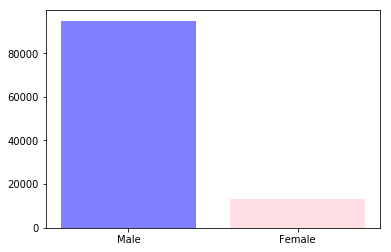

In [24]:
# Same number shown in a bar chart
alpha_color = 0.5
x = ['Male', 'Female']
plt.bar(x[0], male2Count, color='blue', alpha=alpha_color)
plt.bar(x[1], female2Count, color='pink', alpha=alpha_color)

In [25]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Amebiasis
def amebiasisRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Amebiasis']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Count']
    
    return count

In [26]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Malaria
def malariaRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Malaria']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Rate']
    
    return count

In [27]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Hepatitis C
def hepatitisRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Hepatitis C, Chronic']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Rate']
    
    return count

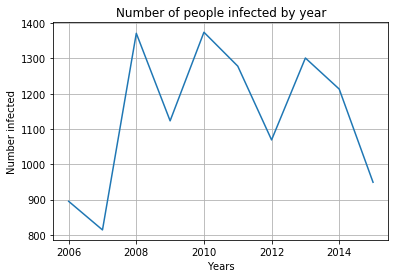

In [28]:
# Line Chart
# This visual show the number of people infected by year.
# You can replace the module in X and Y to show different diseases
# or change the agruement to show small or large cities.
# you can also show the whole dataset

X = list(amebiasisRates(largeCities).keys())
Y = list(amebiasisRates(largeCities).values())
X = sorted(X)

plt.gca().set(xlabel='Years', ylabel='Number infected',
       title='Number of people infected by year')
plt.grid()

# Show the plot of Rings vs Number of Abalones
plt.plot(X, Y)

<BarContainer object of 10 artists>

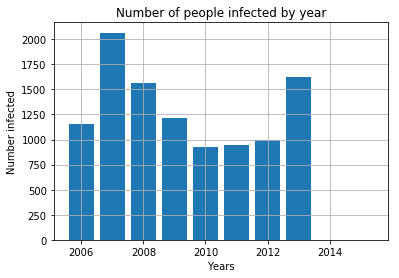

In [29]:
# Bar Chart
# This visual show the number of people infected by year.
# You can replace the module in X and Y to show different diseases
# or change the agruement to show small or large cities.
# you can also show the whole dataset

# Can tell the dataset is missing informatio in this char


X = list(hepatitisRates(smallTowns).keys())
Y = list(hepatitisRates(smallTowns).values())
plt.gca().set(xlabel='Years', ylabel='Number infected',
       title='Number of people infected by year')
plt.grid()
plt.bar(X, Y)

In [30]:
# you can see the missing information from 2014 and 2015
hepatitisRates(smallTowns)

defaultdict(int,
            {2006: 1153.146,
             2008: 1559.368,
             2007: 2065.466,
             2014: 0.0,
             2010: 929.8510000000001,
             2012: 994.4529999999999,
             2011: 945.5349999999999,
             2013: 1623.448,
             2009: 1215.028,
             2015: 0.0})